In [1]:
import json

# Function to load JSON file
def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
    return data

# Example usage
file_path = "/content/parsed_strace_output.txt.json"  # Replace with your JSON file path
json_data = load_json(file_path)

print(json_data[0:10])  # Print the loaded JSON data

[{'PID': '2676789', 'Syscall': 'execve', 'Arguments': '"/home/sbanks/miniconda3/envs/ecs251/bin/python", ["python", "ECS251.py"], 0x7fff50f54cb0 /* 35 vars */', 'Return Value': '0'}, {'PID': '2676789', 'Syscall': 'brk', 'Arguments': 'NULL', 'Return Value': '0x1ed1000'}, {'PID': '2676789', 'Syscall': 'arch_prctl', 'Arguments': '0x3001 /* ARCH_??? */, 0x7ffc187d9b10', 'Return Value': '-1 EINVAL (Invalid argument)'}, {'PID': '2676789', 'Syscall': 'readlink', 'Arguments': '"/proc/self/exe", "/home/sbanks/miniconda3/envs/ecs"..., 4096', 'Return Value': '50'}, {'PID': '2676789', 'Syscall': 'access', 'Arguments': '"/etc/ld.so.preload", R_OK', 'Return Value': '-1 ENOENT (No such file or directory)'}, {'PID': '2676789', 'Syscall': 'openat', 'Arguments': 'AT_FDCWD, "/home/sbanks/miniconda3/envs/ecs251/bin/../lib/tls/x86_64/x86_64/libpthread.so.0", O_RDONLY|O_CLOEXEC', 'Return Value': '-1 ENOENT (No such file or directory)'}, {'PID': '2676789', 'Syscall': 'stat', 'Arguments': '"/home/sbanks/minic

In [31]:
syscalls = []

for i in json_data:
  syscalls.append(i['Syscall'])

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

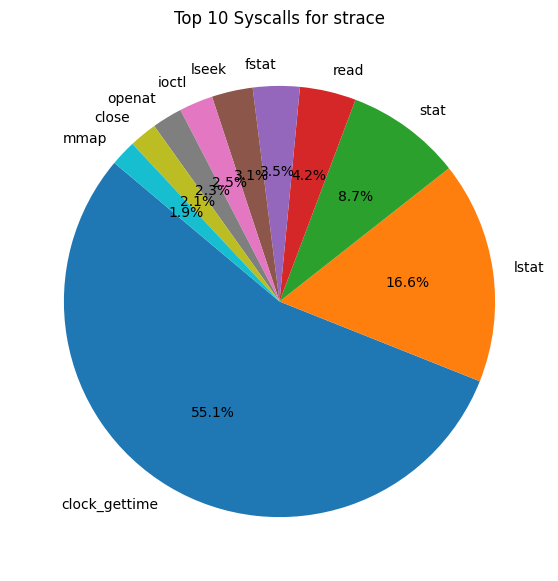

In [15]:
data = Counter(syscalls)
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True)[:10])
labels = list(sorted_data.keys())
values = list(sorted_data.values())

# Creating the pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Syscalls for strace")
plt.show()

In [39]:
i = 0
lst = []
window = 200
while i + window < len(syscalls):
  lst.append(Counter(syscalls[i:i+window]).most_common(1)[0][0])
  i += window

In [40]:
lst

['stat',
 'rt_sigaction',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'mmap',
 'mmap',
 'clock_gettime',
 'clock_gettime',
 'clock_gettime',
 'clock_gettime',
 'clock_gettime',
 'clock_gettime',
 'brk',
 'brk',
 'sched_setaffinity',
 'sched_setaffinity',
 'read',
 'read',
 'read',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'mmap',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'mmap',
 'stat',
 'munmap',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'stat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',
 'lstat',

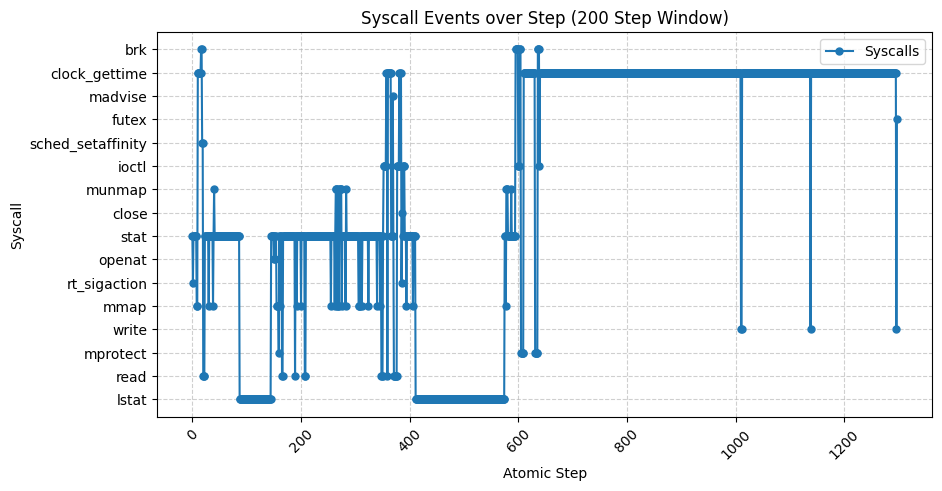

In [49]:
unique_syscalls = list(set(lst))
syscall_indices = [unique_syscalls.index(s) for s in lst]

# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(syscall_indices))], syscall_indices, marker='o', linestyle='-', markersize=5, label="Syscalls")

# Customize the chart
plt.yticks(range(len(unique_syscalls)), unique_syscalls)  # Map numeric indices back to syscall names
plt.xlabel("Atomic Step")
plt.ylabel("Syscall")
plt.title("Syscall Events over Step (200 Step Window)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the chart
plt.show()